In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

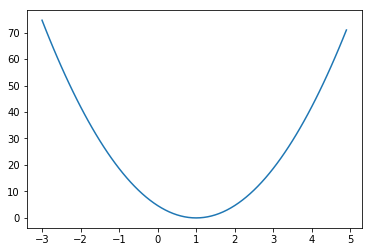

In [4]:
X = [1,2,3]
Y = [1,2,3]

W = tf.placeholder(tf.float32)

#our hypothesis for linear model X * W
hypothesis = W*X

#cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

#W,cost값 저장할 리스트 생성
W_val = []
cost_val = []

#W는 0.1 간격으로 -3~5까지 움직이겠다
for i in range(-30,50):
    feed_W = i * 0.1
    curr_cost, curr_w = sess.run([cost, W], feed_dict={W:feed_W})
    W_val.append(curr_w)
    cost_val.append(curr_cost)
    
plt.plot(W_val,cost_val)
plt.show()

In [7]:
x_data = [1,2,3]
y_data = [1,2,3]

W = tf.Variable(tf.random_normal([1]),name = 'weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = X*W

cost = tf.reduce_mean(tf.square(hypothesis-Y))

#Minimize : Gradient Descent using derivative : W -= learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W*X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(21):
    sess.run(update, feed_dict={X:x_data, Y:y_data})
    print(step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W))

0 0.0107923 [ 1.04808986]
1 0.0030698 [ 1.02564788]
2 0.000873189 [ 1.01367891]
3 0.000248371 [ 1.00729537]
4 7.06472e-05 [ 1.00389087]
5 2.00967e-05 [ 1.0020752]
6 5.71607e-06 [ 1.00110674]
7 1.62546e-06 [ 1.00059021]
8 4.6263e-07 [ 1.00031483]
9 1.31472e-07 [ 1.00016785]
10 3.73817e-08 [ 1.00008953]
11 1.06753e-08 [ 1.0000478]
12 3.03707e-09 [ 1.00002551]
13 8.6186e-10 [ 1.00001359]
14 2.48505e-10 [ 1.00000727]
15 6.79089e-11 [ 1.00000381]
16 1.96536e-11 [ 1.00000203]
17 5.63224e-12 [ 1.00000107]
18 1.80478e-12 [ 1.0000006]
19 5.16328e-13 [ 1.00000036]
20 2.65269e-13 [ 1.00000024]


In [9]:
X = [1,2,3]
Y = [1,2,3]

#set wrong model weights
W = tf.Variable(5.0)
hypothesis = X * W
cost = tf.reduce_mean(tf.square(hypothesis - Y))

#minimize : Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100):
    print(step, sess.run(W))
    sess.run(train)

0 5.0
1 1.26667
2 1.01778
3 1.00119
4 1.00008
5 1.00001
6 1.0
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0
25 1.0
26 1.0
27 1.0
28 1.0
29 1.0
30 1.0
31 1.0
32 1.0
33 1.0
34 1.0
35 1.0
36 1.0
37 1.0
38 1.0
39 1.0
40 1.0
41 1.0
42 1.0
43 1.0
44 1.0
45 1.0
46 1.0
47 1.0
48 1.0
49 1.0
50 1.0
51 1.0
52 1.0
53 1.0
54 1.0
55 1.0
56 1.0
57 1.0
58 1.0
59 1.0
60 1.0
61 1.0
62 1.0
63 1.0
64 1.0
65 1.0
66 1.0
67 1.0
68 1.0
69 1.0
70 1.0
71 1.0
72 1.0
73 1.0
74 1.0
75 1.0
76 1.0
77 1.0
78 1.0
79 1.0
80 1.0
81 1.0
82 1.0
83 1.0
84 1.0
85 1.0
86 1.0
87 1.0
88 1.0
89 1.0
90 1.0
91 1.0
92 1.0
93 1.0
94 1.0
95 1.0
96 1.0
97 1.0
98 1.0
99 1.0


In [11]:
X = [1,2,3]
Y = [1,2,3]

W=tf.Variable(5.)

hypothesis = X * W
#manual gradient
gradient = tf.reduce_mean(tf.square(W * X - Y)*X) * 2

cost = tf.reduce_mean(tf.square(hypothesis-Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

#Get gradients (cost에 맞는 gradient 계산)
gvs = optimizer.compute_gradients(cost, [W])
#중간에 수정 가능
#Apply gradients
apply_gradients = optimizer.apply_gradients(gvs)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100):
    print(step, sess.run([gradient, W, gvs]))
    sess.run(apply_gradients)

0 [384.0, 5.0, [(37.333336, 5.0)]]
1 [315.66501, 4.6266665, [(33.848888, 4.6266665)]]
2 [259.49066, 4.2881775, [(30.689657, 4.2881775)]]
3 [213.31282, 3.9812808, [(27.825287, 3.9812808)]]
4 [175.35266, 3.703028, [(25.228264, 3.703028)]]
5 [144.14766, 3.4507453, [(22.873623, 3.4507453)]]
6 [118.49579, 3.2220092, [(20.738752, 3.2220092)]]
7 [97.408813, 3.0146217, [(18.803137, 3.0146217)]]
8 [80.074371, 2.8265903, [(17.048176, 2.8265903)]]
9 [65.824699, 2.6561086, [(15.457014, 2.6561086)]]
10 [54.110828, 2.5015385, [(14.01436, 2.5015385)]]
11 [44.481506, 2.3613949, [(12.706352, 2.3613949)]]
12 [36.565777, 2.2343314, [(11.520427, 2.2343314)]]
13 [30.058683, 2.119127, [(10.445186, 2.119127)]]
14 [24.709574, 2.0146751, [(9.4703016, 2.0146751)]]
15 [20.312368, 1.9199722, [(8.5864067, 1.9199722)]]
16 [16.69767, 1.8341081, [(7.7850089, 1.8341081)]]
17 [13.726228, 1.756258, [(7.0584083, 1.756258)]]
18 [11.283572, 1.685674, [(6.3996239, 1.685674)]]
19 [9.2755966, 1.6216778, [(5.8023257, 1.6216778